In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
import sklearn    

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df2 = pd.read_csv('eda_data.csv')

In [5]:
print(df.shape)
print(df2.shape)

(742, 28)
(742, 33)


In [7]:
# Get the list of columns for df and df2
columns_df = df.columns.to_list()
columns_df2 = df2.columns.to_list()

# Find the columns that are different
columns_diff = set(columns_df).symmetric_difference(set(columns_df2))

print("Columns in df but not in df2:", set(columns_df) - set(columns_df2))
print("Columns in df2 but not in df:", set(columns_df2) - set(columns_df))
print("Different columns:", columns_diff)

Columns in df but not in df2: set()
Columns in df2 but not in df: {'job_simp', 'desc_len', 'seniority', 'num_comp', 'Unnamed: 0'}
Different columns: {'seniority', 'Unnamed: 0', 'job_simp', 'num_comp', 'desc_len'}


In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [4]:
df = df.select_dtypes(include=['number'])

In [5]:
df.head()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel
0,3.8,1973,0,0,53,91,72.0,0,47,1,0,0,0,1
1,3.4,1984,0,0,63,112,87.5,0,36,1,0,0,0,0
2,4.8,2010,0,0,80,90,85.0,1,10,1,0,1,0,1
3,3.8,1965,0,0,56,97,76.5,1,55,1,0,0,0,0
4,2.9,1998,0,0,86,143,114.5,1,22,1,0,0,0,1


<Axes: title={'center': 'Correlation Matrix'}>

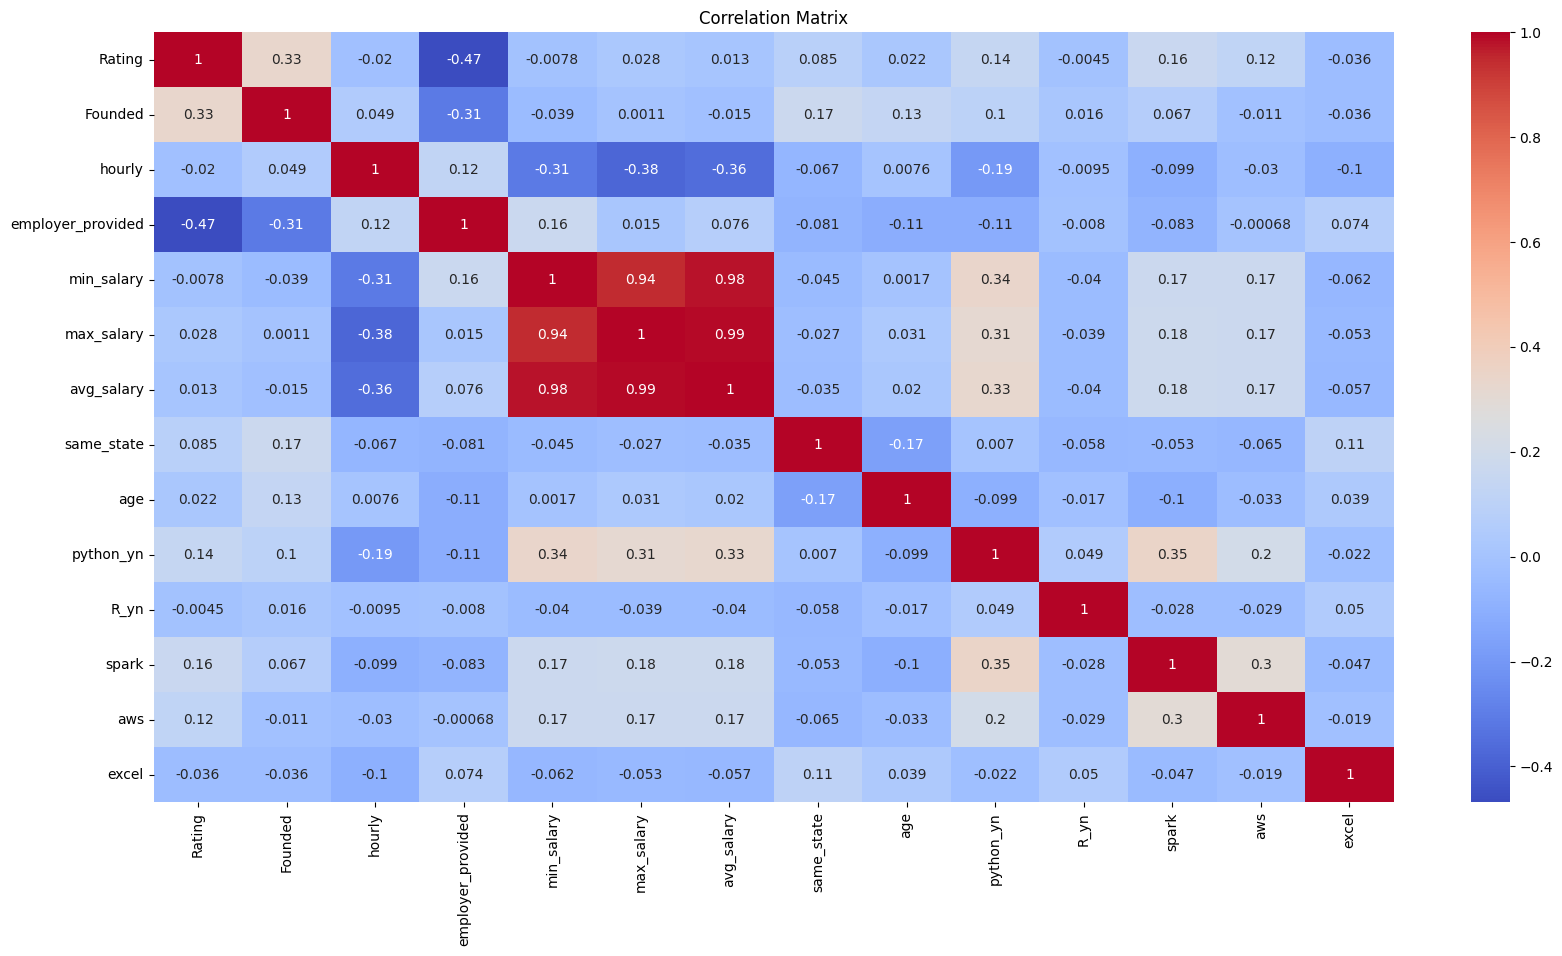

In [7]:
plt.figure(figsize=(20, 10))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Mean Squared Error: 1299.1338844327222
Mean Absolute Error: 28.370366497333787
R^2 Score: 0.20518507927886198


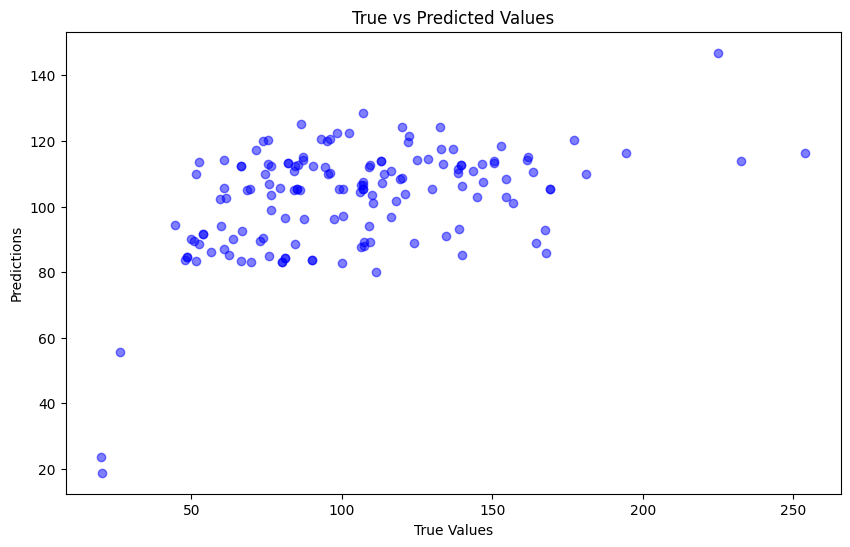

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


X = df.drop(['min_salary', 'max_salary', 'avg_salary'], axis=1)
y = df['avg_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

XGBoost Mean Squared Error: 636.3597949341204
XGBoost Mean Absolute Error: 13.732853140606975
XGBoost R^2 Score: 0.6106727212480187


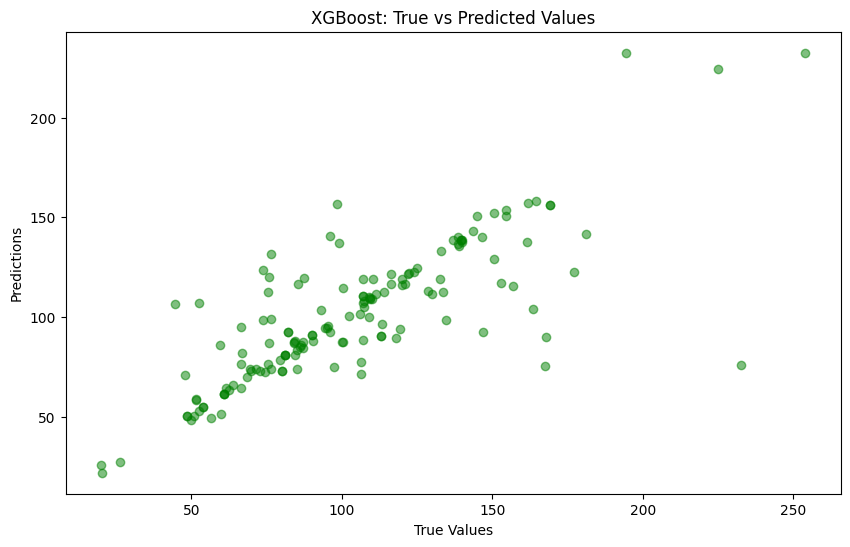

In [16]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost Mean Absolute Error: {mae_xgb}')
print(f'XGBoost R^2 Score: {r2_xgb}')

# Plot True vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('XGBoost: True vs Predicted Values')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Binning the target variable into categories (e.g., high salary vs. low salary)
# Here, we assume avg_salary > 100 is high salary (1), otherwise low salary (0)
y_binary = (y > 100).astype(int)

# Splitting the data into training and testing sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_bin, y_train_bin)

# Make predictions
y_pred_bin = log_reg.predict(X_test_bin)

# Evaluate the model
accuracy = accuracy_score(y_test_bin, y_pred_bin)
conf_matrix = confusion_matrix(y_test_bin, y_pred_bin)
class_report = classification_report(y_test_bin, y_pred_bin)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.6174496644295302
Confusion Matrix:
[[51 25]
 [32 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.67      0.64        76
           1       0.62      0.56      0.59        73

    accuracy                           0.62       149
   macro avg       0.62      0.62      0.62       149
weighted avg       0.62      0.62      0.62       149



/Users/sheikanasallyozeer/Desktop/salary_prediction/dsenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
